In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

import plotly
plotly.offline.init_notebook_mode(connected=True)

In [3]:
import rasterio as rio
import tifffile as tiff

(5760, 8640)


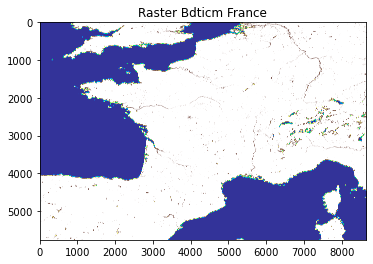

In [4]:
from skimage.io import imread
image = imread('data/rasters/bdticm/bdticm_FR.tif')
print (image.shape)
plt.imshow(image[:,:], cmap = 'terrain')#it was [:,:,0]
plt.axes = False
plt.title("Raster Bdticm France");

In [5]:
from GLC.data_loading.environmental_raster import PatchExtractor
from torch.utils.data import Dataset, DataLoader

In [5]:
extractor_bio = PatchExtractor("data/rasters", size=256)
extractor_bio.add_all_bioclimatic_rasters()
extractor_bio.append('sndppt')
print("Number of rasters: {}".format(len(extractor_bio)))


NameError: name 'PatchExtractor' is not defined

In [4]:
fig = plt.figure(figsize=(14, 10))
extractor_bio.plot((43.61, 3.88), fig=fig)

NameError: name 'plt' is not defined

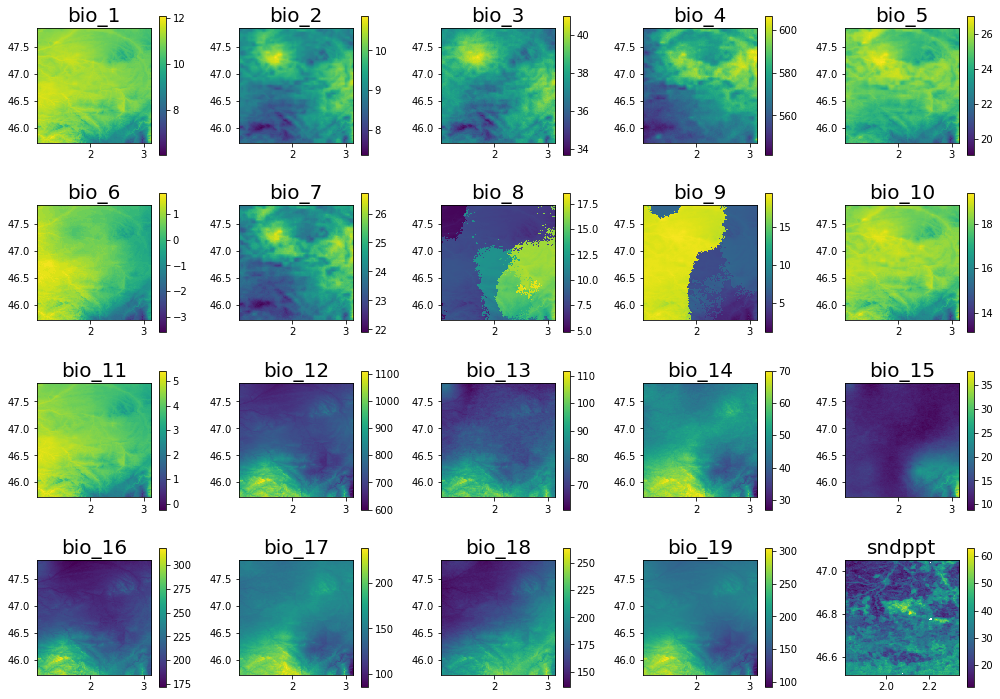

In [8]:
fig = plt.figure(figsize=(14, 10))
extractor_bio.plot((46.783695,2.072855), fig=fig)

In [9]:
bio_batches = extractor_bio[(46.783695,2.072855)]

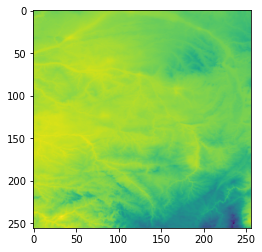

In [10]:
plt.imshow(bio_batches[0])

In [33]:
from GLC.data_loading.pytorch_dataset import GeoLifeCLEF2022Dataset
dataset = GeoLifeCLEF2022Dataset("data",subset = "train", 
                                 region = 'fr', 
                                 patch_data = 'altitude', \
                                 use_rasters = True,\
                                 #transform = get_train_transforms(),\
                                 transform = None,\
                                 patch_extractor = extractor_bio )
print(len(dataset))

656263


In [34]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

In [35]:
import torch
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
print(len(train_dataset))
print(len(val_dataset))
train_loader = DataLoader(train_dataset, batch_size=16,num_workers = 0,shuffle = True,drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=16, num_workers = 0,shuffle = False,drop_last=True)

525010
131253


<Figure size 720x864 with 0 Axes>

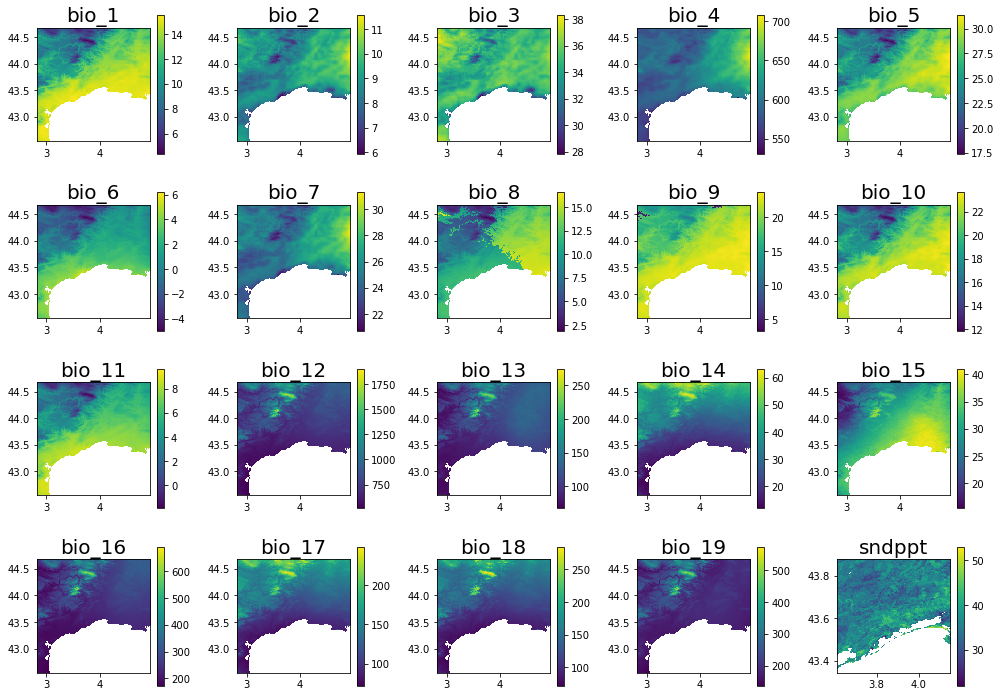

In [36]:
image_patch,target  = iter(train_loader).next()
plt.figure(figsize=(10, 12))

fig = plt.figure(figsize=(14, 10))
train_dataset.dataset.patch_extractor.plot((43.61, 3.88), fig=fig)

